In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

### Task 1
**(a)**   
Load the dataset into Pandas in a Python notebook.

In [24]:
df = pd.read_csv("test_vehicle.csv")
df.head()

,cylinders,horsepower,acceleration,CC,Weight,ModelYear,l/100km
0,8,130.0,12.0,5031,1576,2010,15.69
1,8,165.0,11.5,5736,1661,2010,18.83
2,8,150.0,11.0,5212,1546,2010,15.69
3,8,150.0,12.0,4982,1544,2010,17.66
4,8,140.0,10.5,4949,1552,2010,16.62


**(b)**   

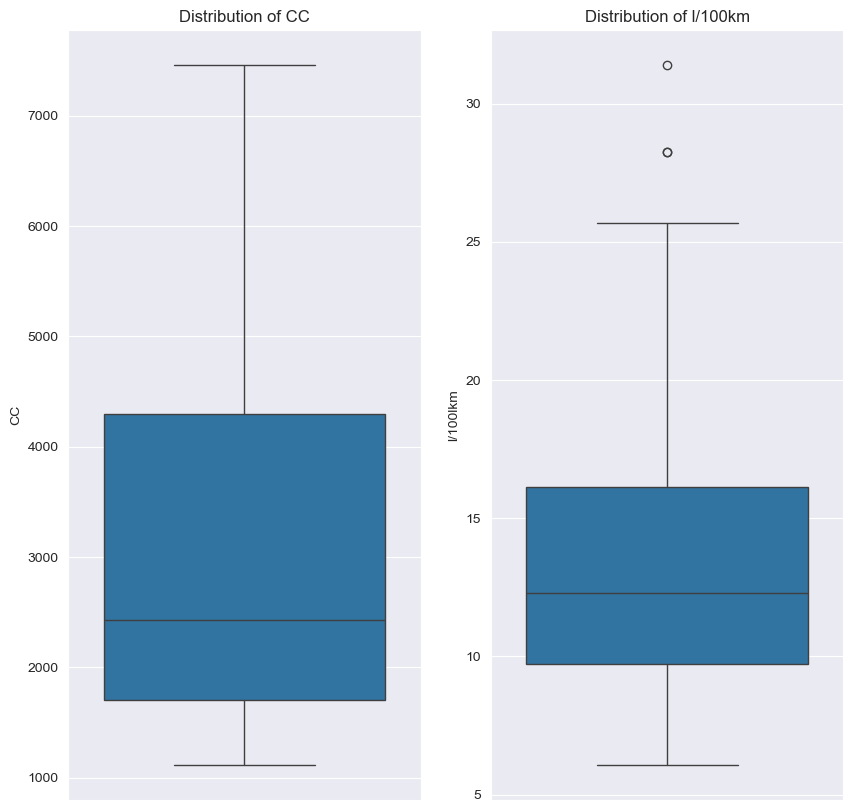

In [25]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
sns.boxplot(data=df[["CC"]], y="CC", ax=ax)
plt.title(f"Distribution of CC")
plt.ylabel("CC")
ax = plt.subplot(1, 2, 2)
sns.boxplot(data=df[["l/100km"]], y="l/100km", ax=ax)
plt.title(f"Distribution of l/100km")
plt.ylabel("l/100lkm")
plt.show()

As we can see in the above plots, the distribution of CC doesn't have any outliers, but in the other one we have 2 upper outliers.

**(c)**   

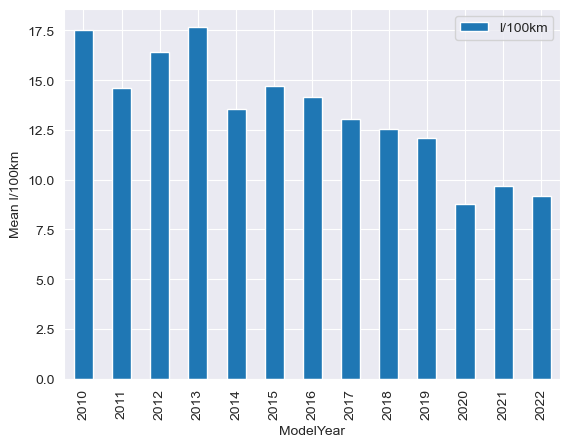

In [26]:
mean_l = df[["ModelYear", "l/100km"]].groupby(["ModelYear"]).mean()
mean_l.plot(kind="bar")
plt.ylabel("Mean l/100km")
plt.show()

I've used a barplot to show the mean of l/100km over all the years.

**(d)**   

In [27]:
# how many missing values per column?
null_values = df.isnull().sum()
# print only columns with missing values
null_values[null_values > 0]

horsepower    26
dtype: int64

In [28]:
print(f"Rows {df.shape[0]}")
df.dropna(inplace=True)
print(f"Rows {df.shape[0]}")

Rows 398
Rows 372


The strategy I used for the missing values is just dropping the whole row because we cannot get the values of HP without having the torque.

### Task 2
**(a)**

In [29]:
df1 = df.copy()
df1.pop("l/100km")
X = df1

Column cylinders
MSE: 6.6687129490012635
Coefficient (slope): [2.31176134]
Intercept: [0.85937957]

Column horsepower
MSE: 6.016919090340524
Coefficient (slope): [0.10518712]
Intercept: [2.53770221]

Column acceleration
MSE: 17.62171831683246
Coefficient (slope): [-0.75714128]
Intercept: [25.2969493]

Column CC
MSE: 5.642903287082341
Coefficient (slope): [0.00238724]
Intercept: [5.90587275]

Column Weight
MSE: 4.893445349115749
Coefficient (slope): [0.01090181]
Intercept: [-1.11282507]

Column ModelYear
MSE: 15.004092313211375
Coefficient (slope): [-0.71516295]
Intercept: [1455.24064386]



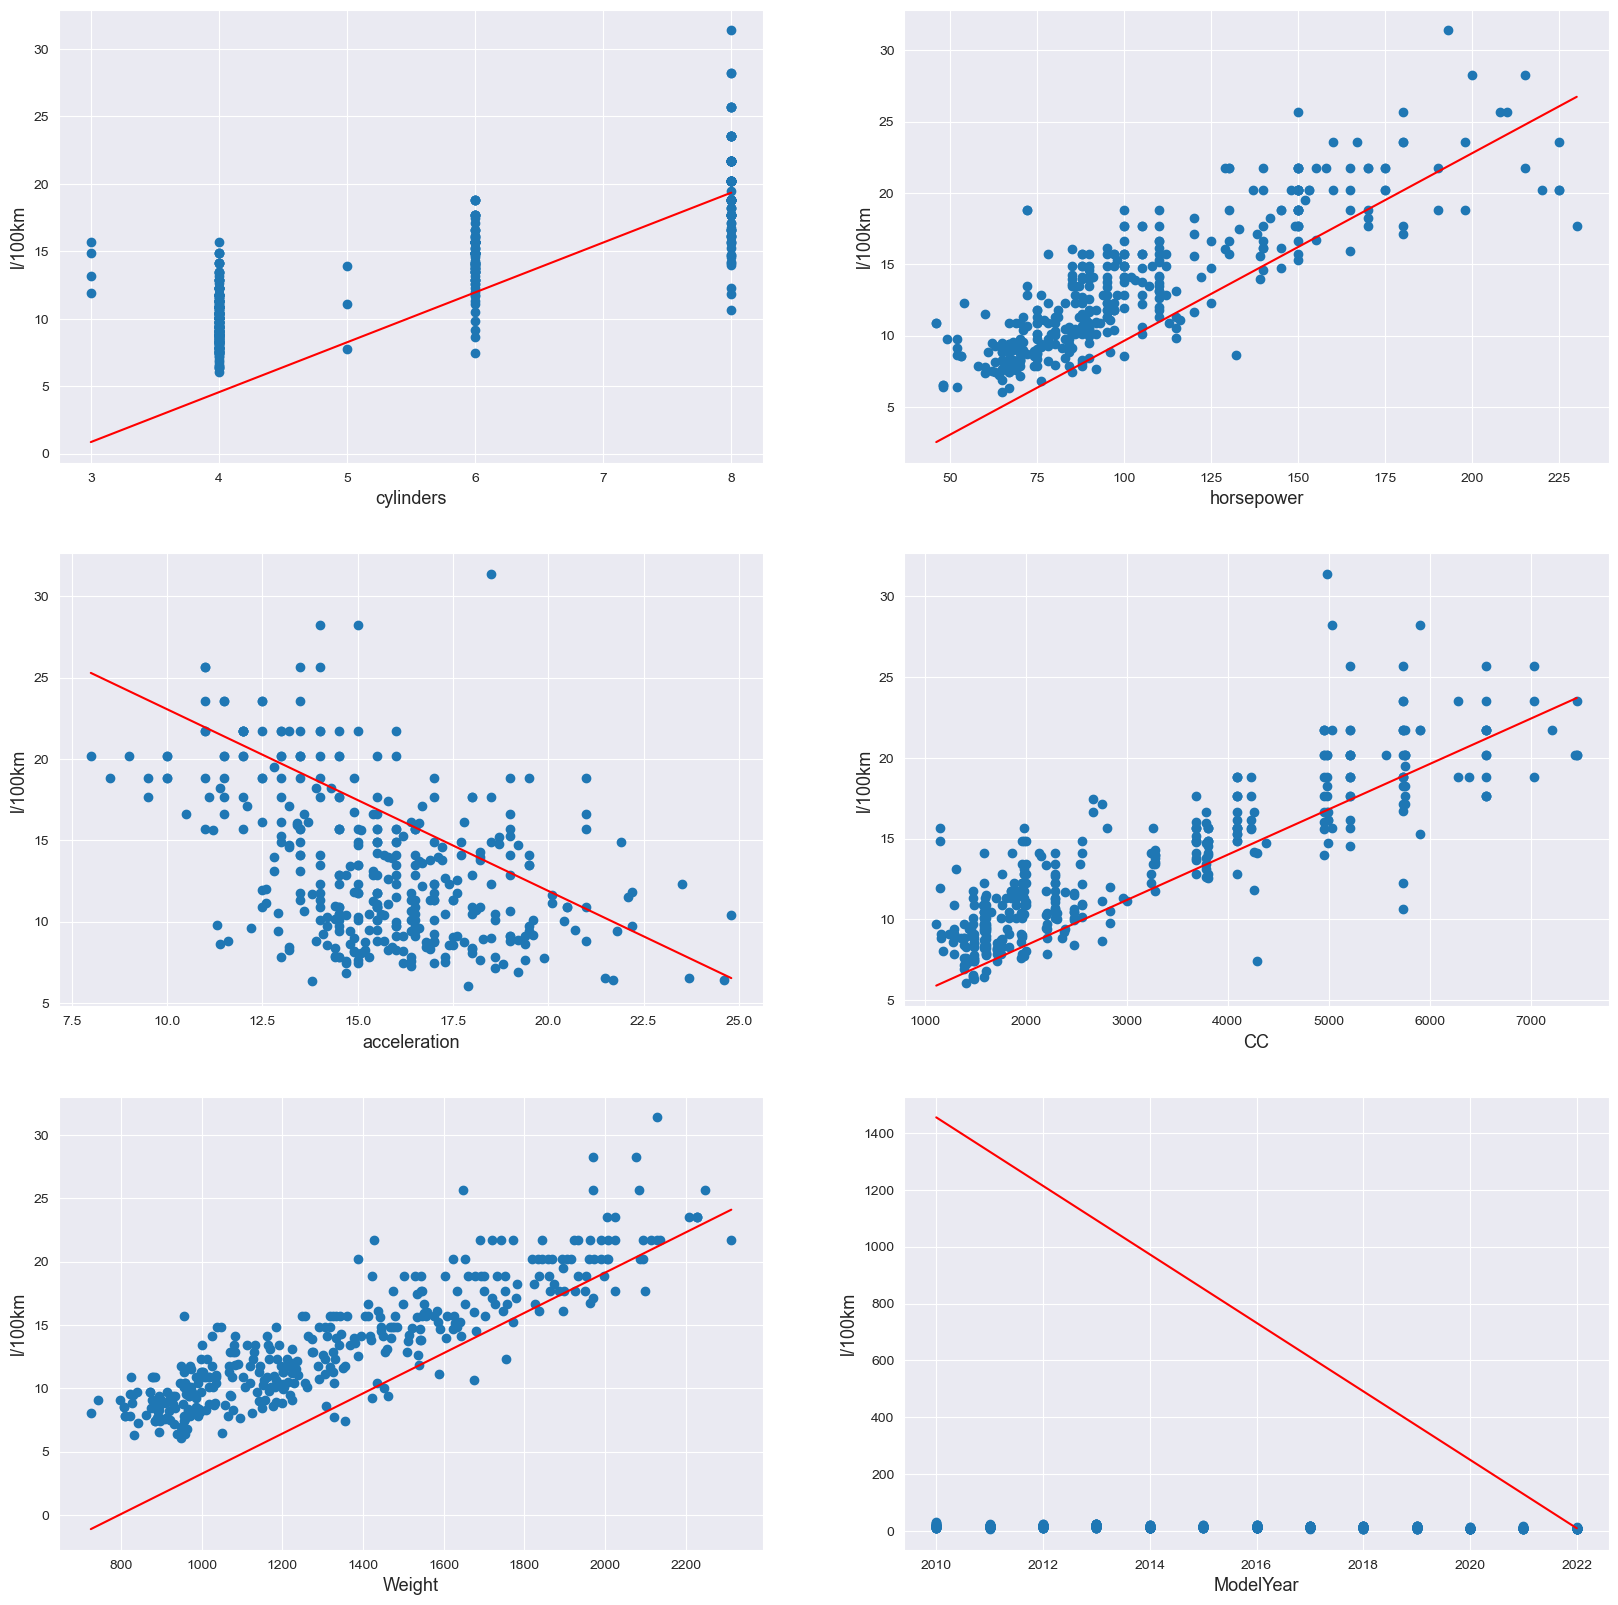

In [30]:
plt.figure(figsize=(20,20))
y = df[["l/100km"]]
mse = []
for i, col in enumerate(X, start=1):
    x = df[[col]].values
    model = LinearRegression()
    model.fit(x, y)
    print("Column " + col)
    print(f"MSE: {mean_squared_error(y, model.predict(x))}")
    print(f"Coefficient (slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}\n")
    mse.append((mean_squared_error(y, model.predict(x)), col))
    # plot the data
    ax = plt.subplot(3, 2, i)
    plt.scatter(x, y)
    # plot the regression line
    m = model.coef_[0]
    b = model.intercept_
    plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
    plt.xlabel(col, fontsize=13)
    plt.ylabel("l/100km", fontsize=13)
plt.show()

### i)

The strategy I used is plotting the values with a linear regression model and calculating their mean squared error, so I can see what is the correlation between the every feature in particular and "l/100km".

In [31]:
sorted(mse)

[(4.893445349115749, 'Weight'),
 (5.642903287082341, 'CC'),
 (6.016919090340524, 'horsepower'),
 (6.6687129490012635, 'cylinders'),
 (15.004092313211375, 'ModelYear'),
 (17.62171831683246, 'acceleration')]

### ii)

Above we can see a ranking of the best feature for prediction with the lowest mean squared error. The first 4 tuples are the best.

### iii)

The same as before, but now the last 4 tuples.

**(b)**   


In [32]:
x = X.values
reg = LinearRegression().fit(x, y)
print(f"MSE: {mean_squared_error(y, reg.predict(x))}")

MSE: 2.5908416957084865


As we can see if we use all the feature we get a low mean squared error, better than using only one of the feature, just like we did above.

**(c)**  


In [33]:
x = X[["Weight", "CC", "horsepower", "cylinders"]].values
reg = LinearRegression().fit(x, y)
print(f"Best features MSE: {mean_squared_error(y, reg.predict(x))}")
x = X[["horsepower", "cylinders", "ModelYear", "acceleration"]].values
reg = LinearRegression().fit(x, y)
print(f"Worst features MSE: {mean_squared_error(y, reg.predict(x))}")

Best features MSE: 4.0940899868294025
Worst features MSE: 3.3356825408357373


Surprisingly the model with the worst features is doing a better job than the one with the best feature, it could be the fact that the best features excel in the same area, but the worst feature excel in other areas so together they get a better score than the best feature. We could say teamwork makes the dream work.